<a href="https://colab.research.google.com/github/retutux-arch/Desafio_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



## En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [14]:
import pandas as pd

tienda_ingresos = tienda['Precio'].sum()
tienda2_ingresos = tienda2['Precio'].sum()
tienda3_ingresos = tienda3['Precio'].sum()
tienda4_ingresos = tienda4['Precio'].sum()
df_ingresos_tienda = pd.DataFrame({
                                    'Ingresos': [tienda_ingresos,
                                                 tienda2_ingresos,
                                                 tienda3_ingresos,
                                                 tienda4_ingresos]},
                                    index=['Tienda 1', 'Tienda 2',
                                          'Tienda 3', 'Tienda 4'])
df_ingresos_tienda

,Ingresos
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


In [12]:
import pandas as pd

total_ingresos = df_ingresos_tienda['Ingresos'].sum()
print(f'El total de ingresos es de {total_ingresos}')

El total de ingresos es de 4403619200.0


# 2. Ventas por categoría

## En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

### Cantidad vendida por categoria en cada una de las tiendas

In [43]:
import pandas as pd

tienda_categorias = tienda.groupby('Categoría del Producto')['Categoría del Producto'].count()
tienda2_categorias = tienda2.groupby('Categoría del Producto')['Categoría del Producto'].count()
tienda3_categorias = tienda3.groupby('Categoría del Producto')['Categoría del Producto'].count()
tienda4_categorias = tienda4.groupby('Categoría del Producto')['Categoría del Producto'].count()
df_tienda_categorias = pd.DataFrame({ 'Ventas_tienda_1': tienda_categorias,
                                      'Ventas_tienda_2': tienda2_categorias,
                                      'Ventas_tienda_3': tienda3_categorias,
                                      'Ventas_tienda_4': tienda4_categorias})
df_tienda_categorias

,Ventas_tienda_1,Ventas_tienda_2,Ventas_tienda_3,Ventas_tienda_4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


## Producto mas vendido en base aporcentaje en cada una de las tiendas

In [67]:
import pandas as pd

mas_vendido_tienda= tienda['Categoría del Producto'].value_counts(normalize=True).to_frame().sort_values('Categoría del Producto')
mas_vendido_tienda2= tienda2['Categoría del Producto'].value_counts(normalize=True).to_frame().sort_values('Categoría del Producto')
mas_vendido_tienda3= tienda3['Categoría del Producto'].value_counts(normalize=True).to_frame().sort_values('Categoría del Producto')
mas_vendido_tienda4= tienda4['Categoría del Producto'].value_counts(normalize=True).to_frame().sort_values('Categoría del Producto')
df_populares = pd.DataFrame({ 'Mas_vendido_tienda_1': (mas_vendido_tienda['proportion'] * 100).round(2),
                              'Mas_vendido_tienda_2': (mas_vendido_tienda2['proportion'] * 100).round(2),
                              'Mas_vendido_tienda_3': (mas_vendido_tienda3['proportion'] * 100).round(2),
                              'Mas_vendido_tienda_4': (mas_vendido_tienda4['proportion'] * 100).round(2)})
df_populares

,Mas_vendido_tienda_1,Mas_vendido_tienda_2,Mas_vendido_tienda_3,Mas_vendido_tienda_4
Categoría del Producto,,,,
Artículos para el hogar,7.25,7.67,7.50,8.52
Deportes y diversión,12.04,11.66,11.74,11.75
Electrodomésticos,13.23,12.93,11.78,10.77
Electrónicos,18.99,17.89,19.12,19.13
Instrumentos musicales,7.72,9.50,7.50,7.21
Juguetes,13.73,13.27,13.35,14.33
Libros,7.33,8.35,7.84,7.93
Muebles,19.71,18.74,21.15,20.36


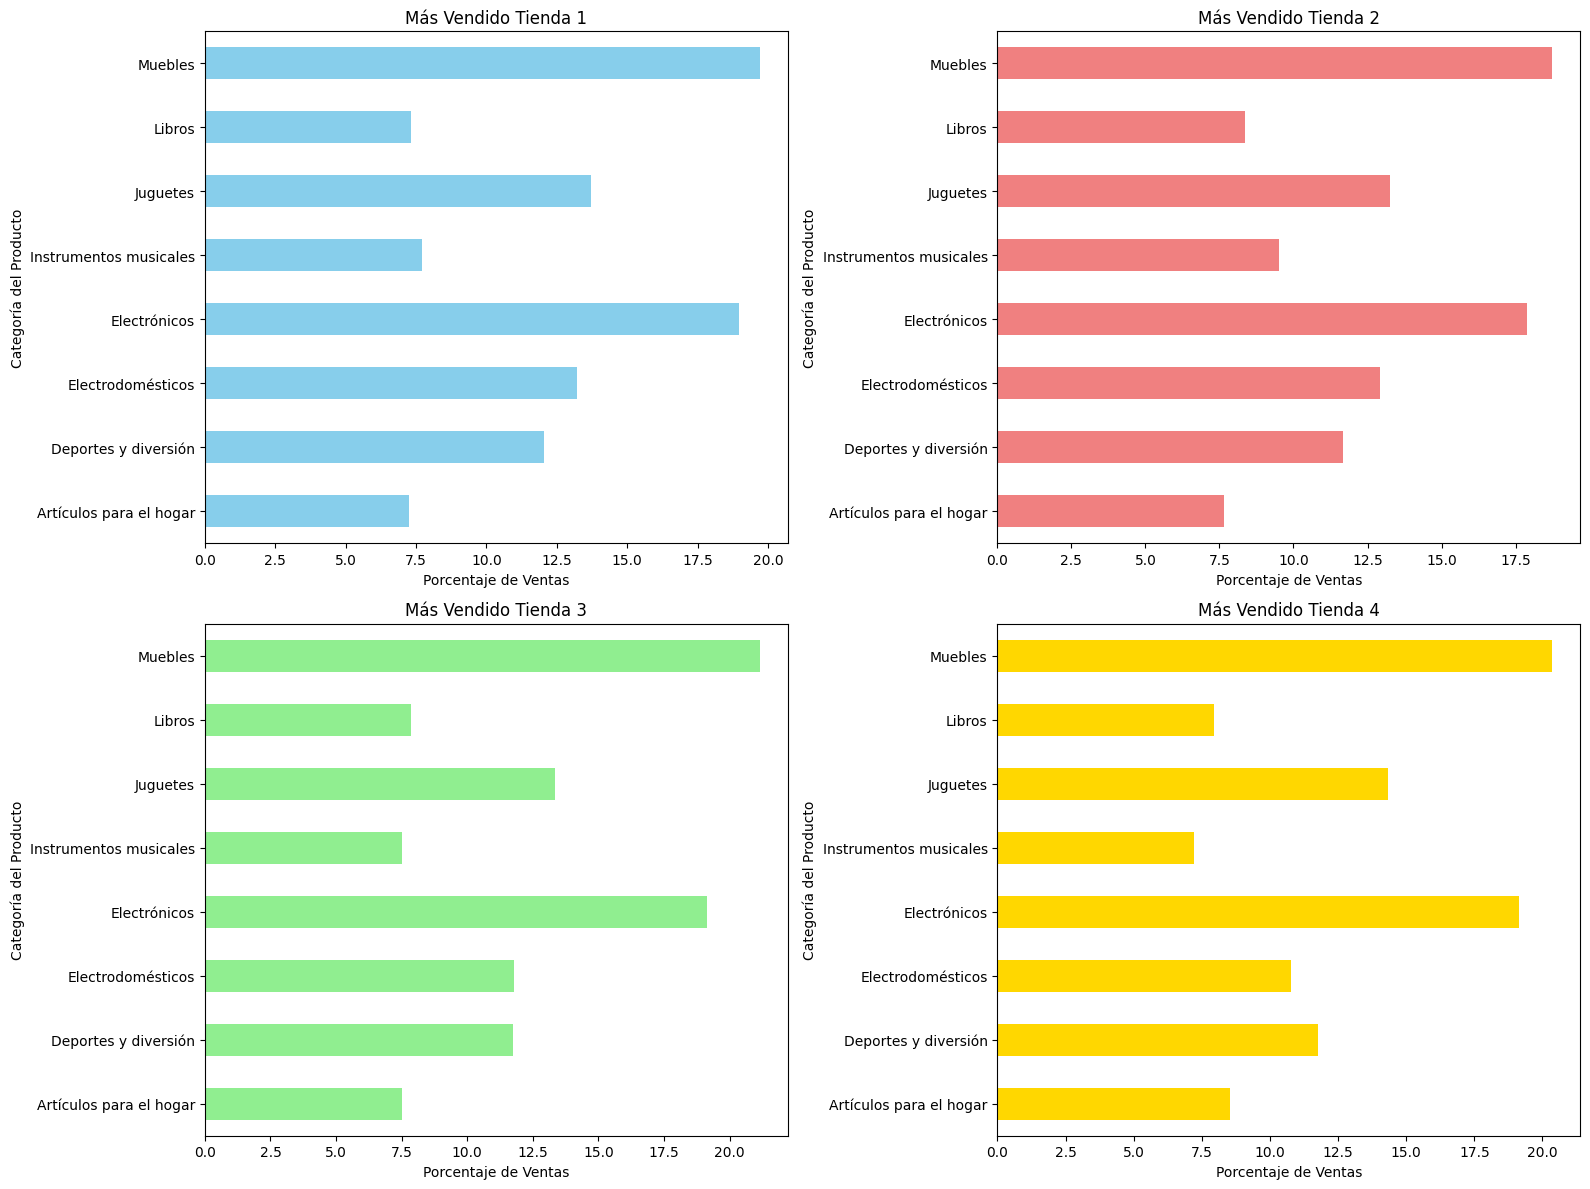

In [75]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

df_populares['Mas_vendido_tienda_1'].plot(kind='barh', ax=axes[0, 0], title='Más Vendido Tienda 1', color='skyblue')
df_populares['Mas_vendido_tienda_2'].plot(kind='barh', ax=axes[0, 1], title='Más Vendido Tienda 2', color='lightcoral')
df_populares['Mas_vendido_tienda_3'].plot(kind='barh', ax=axes[1, 0], title='Más Vendido Tienda 3', color='lightgreen')
df_populares['Mas_vendido_tienda_4'].plot(kind='barh', ax=axes[1, 1], title='Más Vendido Tienda 4', color='gold')

for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel('Porcentaje de Ventas')
        ax.set_ylabel('Categoría del Producto')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


## En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [83]:
import pandas as pd

calificacion_tienda = tienda['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()
calificaciones_tiendas = pd.DataFrame({'Calificacion_tienda': calificacion_tienda,
                                       'Calificacion_tienda2': calificacion_tienda2,
                                       'Calificacion_tienda3': calificacion_tienda3,
                                       'Calificacion_tienda4': calificacion_tienda4,},
                                      index=['Promedio']).round(2)
calificaciones_tiendas

,Calificacion_tienda,Calificacion_tienda2,Calificacion_tienda3,Calificacion_tienda4
Promedio,3.98,4.04,4.05,4.0


# 4. Productos más y menos vendidos

## En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [137]:
import pandas as pd
cantidad_por_producto = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False)

producto_mas_vendido = cantidad_por_producto.index[0]
cantidad_mas_vendido = cantidad_por_producto.iloc[0]

producto_menos_vendido = cantidad_por_producto.index[-1]
cantidad_menos_vendido = cantidad_por_producto.iloc[-1]

df_mas_menos_vendidos = pd.DataFrame({
    'Cantidad': [cantidad_mas_vendido, cantidad_menos_vendido]
}, index=[producto_mas_vendido, producto_menos_vendido])

df_mas_menos_vendidos

,Cantidad
Armario,60
Auriculares con micrófono,33


In [141]:
import pandas as pd

# Lista de DataFrames de las tiendas y sus nombres
nombres_tienda = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

def get_most_least_sold_products(df, store_name):
    """
    Calcula el producto más y menos vendido para un DataFrame de tienda dado.
    Retorna una lista de diccionarios con la información.
    """
    cantidad_por_producto = df.groupby('Producto')['Producto'].count().sort_values(ascending=False)

    producto_mas_vendido = cantidad_por_producto.index[0]
    cantidad_mas_vendido = cantidad_por_producto.iloc[0]

    producto_menos_vendido = cantidad_por_producto.index[-1]
    cantidad_menos_vendido = cantidad_por_producto.iloc[-1]

    return [
        {'Tienda': store_name, 'Tipo': 'Más Vendido', 'Producto': producto_mas_vendido, 'Cantidad': cantidad_mas_vendido},
        {'Tienda': store_name, 'Tipo': 'Menos Vendido', 'Producto': producto_menos_vendido, 'Cantidad': cantidad_menos_vendido}
    ]

# Recopilar datos de todas las tiendas
total_productos = []
for store_name, df_store in nombres_tienda.items():
    total_productos.extend(get_most_least_sold_products(df_store, store_name))

# Crear el DataFrame consolidado
df_productos_vendidos_consolidado_conciso = pd.DataFrame(total_productos)
display(df_productos_vendidos_consolidado_conciso)


,Tienda,Tipo,Producto,Cantidad
0,Tienda 1,Más Vendido,Armario,60
1,Tienda 1,Menos Vendido,Auriculares con micrófono,33
2,Tienda 2,Más Vendido,Iniciando en programación,65
3,Tienda 2,Menos Vendido,Juego de mesa,32
4,Tienda 3,Más Vendido,Kit de bancas,57
5,Tienda 3,Menos Vendido,Bloques de construcción,35
6,Tienda 4,Más Vendido,Cama box,62
7,Tienda 4,Menos Vendido,Guitarra eléctrica,33


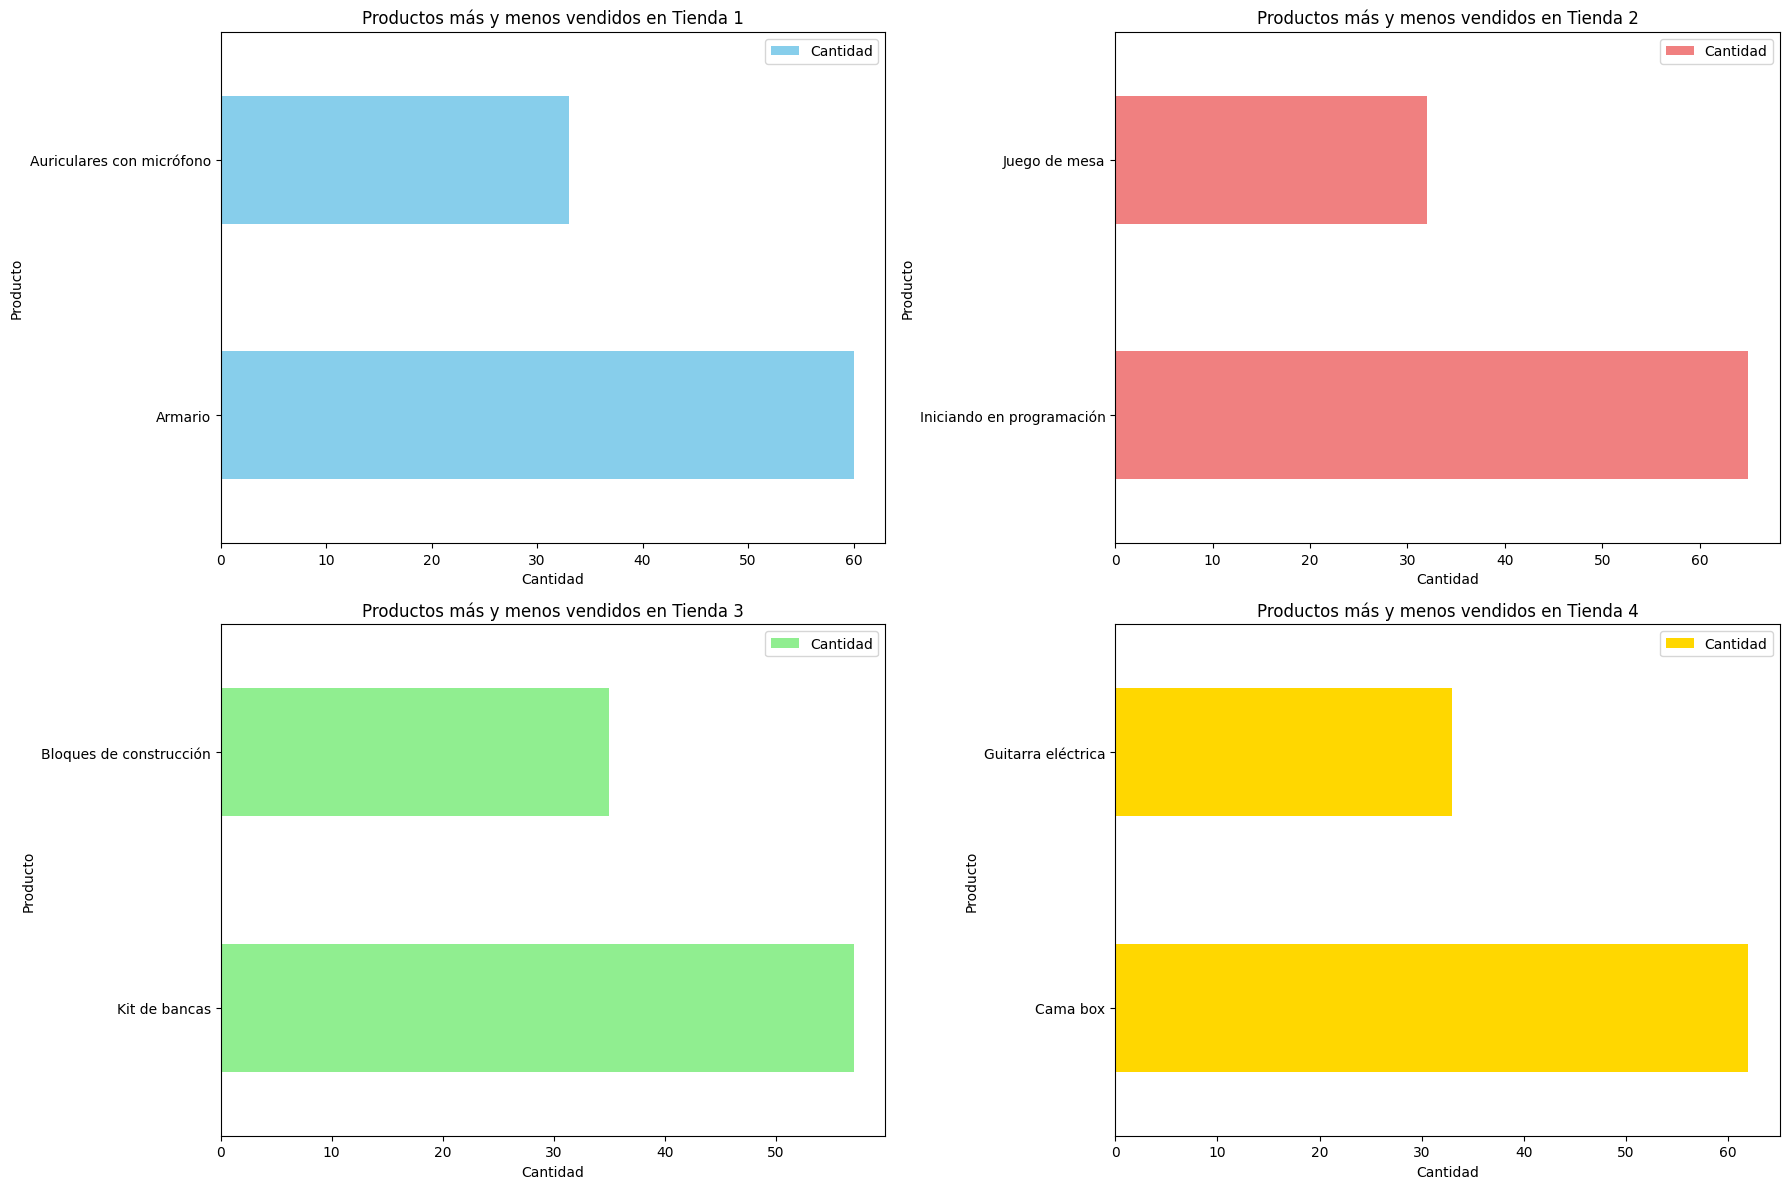

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los nombres únicos de las tiendas del DataFrame consolidado
nombres_tiendas = df_productos_vendidos_consolidado_conciso['Tienda'].unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten() # Aplanar el arreglo de ejes para facilitar la iteración

# Colores para cada tienda (opcional, para mantener consistencia visual)
colors_by_store = {
    'Tienda 1': 'skyblue',
    'Tienda 2': 'lightcoral',
    'Tienda 3': 'lightgreen',
    'Tienda 4': 'gold'
}

# Bucle para procesar cada tienda y graficar
for i, store_name in enumerate(nombres_tiendas):
    current_ax = axes[i]

    # Filtrar el DataFrame consolidado para la tienda actual
    tienda_para_plot = df_productos_vendidos_consolidado_conciso[df_productos_vendidos_consolidado_conciso['Tienda'] == store_name]

    # Crear un DataFrame temporal para el trazado de esta tienda
    # Los nombres de los productos como índice y la Cantidad como columna
    dato_plot = tienda_para_plot.set_index('Producto')[['Cantidad']]

    # Trazar el gráfico de barras horizontal
    # Usamos el color específico de la tienda para el producto más vendido y 'firebrick' para el menos vendido
    dato_plot.plot(kind='barh', ax=current_ax, color=[colors_by_store[store_name], 'firebrick'])

    # Configurar título y etiquetas
    current_ax.set_title(f'Productos más y menos vendidos en {store_name}')
    current_ax.set_xlabel('Cantidad')
    current_ax.set_ylabel('Producto')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

## En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [149]:
import pandas as pd

costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

df_costos_envio_promedio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [costo_envio_promedio_tienda1,
                                 costo_envio_promedio_tienda2,
                                 costo_envio_promedio_tienda3,
                                 costo_envio_promedio_tienda4]
})

df_costos_envio_promedio['Costo de Envío Promedio'] = df_costos_envio_promedio['Costo de Envío Promedio'].round(2)
df_costos_envio_promedio

,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46
